In [34]:
from datetime import datetime
from sklearn.manifold import TSNE
import pickle
import copy
import numpy as np
import time
import os
from PIL import Image
import matplotlib.pyplot as plt
import plotly
import pandas as pd
import sklearn

import matplotlib
matplotlib.use('Agg')
#import torch
import numpy as np
from sklearn.metrics import roc_curve, auc, roc_auc_score, cohen_kappa_score, jaccard_similarity_score, log_loss,recall_score, precision_score
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle
import matplotlib.pyplot as plt
from PIL import Image
import os
%matplotlib inline

In [54]:
t = pickle.load(open( "file_names_3.p", "rb" ))
import pickle
l = pickle.load( open( "labels_all_3.p", "rb" ))
f = pickle.load( open( "finalWs_all_3.p", "rb" ))
p = pickle.load( open( "predictions_all_3.p", "rb" ))
#actual predictions
p_ = np.argmax(p, axis=1)

In [86]:
p.shape

(567, 21)

In [ ]:
type(f)
l_filter = []
t_filter = []
p_filter = []
f[0]


In [ ]:
np.isnan(f).sum()
for x in range(1,len(f)):
    l_filter.append(l[x])
    t_filter.append(t[x])
    p_filter.append(p_[x])
tt_filter = np.array(t_filter)


In [72]:
labels_ = label_binarize(l, classes = [0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
fpr, tpr, _ = roc_curve(labels[:, 0], p[:, 0])
roc_auc = auc(fpr, tpr)
roc_auc

0.8682805710738671

In [106]:
#pd.set_option('display.max_columns', 100)  # or 1000
#pd.set_option('display.max_rows', 100)
labels_[:,0]
len(p[:, 20])

567

In [7]:

pd.set_option('display.max_rows', 600)

data = zip(t_filter,p_filter,l_filter)
test_results = pd.DataFrame(list(data), columns=['file_name','predicted_class','actual_label'])
test_results = test_results.replace(0,'BLCA').replace(1,'BRCA').replace(2,'CESC').replace(3,'COAD').replace(4,'GBM').replace(5,'HNSC').replace(6,'KICH').replace(7,'KIRC').replace(8,'KIRP').replace(9,'LGG').replace(10,'LIHC').replace(11,'LUAD').replace(12,'LUSC').replace(13,'PAAD').replace(14,'PRAD').replace(15,'SARC').replace(16,'SKCM').replace(17,'STAD').replace(18,'THCA').replace(19,'THYM').replace(20,'UCEC')
test_results.to_csv('test_tsne_results.csv')
test_results      

file_name predicted_class  \
0    test_TCGA-EO-A1Y5-01Z-00-DX1.E32687DB-FBDD-40E...            STAD   
1    test_TCGA-D1-A1NU-01Z-00-DX1.05E01238-0F01-4EF...            STAD   
2    test_TCGA-D1-A15V-01Z-00-DX1.D9A6C45F-3A6F-42D...            LIHC   
3    test_TCGA-BG-A221-01Z-00-DX1.E1AAD8E3-865C-491...            STAD   
4    test_TCGA-D1-A0ZN-01Z-00-DX1.6820106E-317C-419...            STAD   
5    test_TCGA-D1-A103-01Z-00-DX1.72E4FE59-EAED-480...            LIHC   
6    test_TCGA-BG-A0M6-01Z-00-DX1.8FF734BF-6835-45D...            LIHC   
7    test_TCGA-A5-A0GD-01Z-00-DX1.89F8C4CA-A364-451...            STAD   
8    test_TCGA-B5-A3F9-01Z-00-DX1.1A9F6606-71D0-45C...            STAD   
9    test_TCGA-PG-A916-01Z-00-DX7.1F385796-7AEC-43C...            STAD   
10   test_TCGA-AJ-A2QL-01Z-00-DX1.B5C0B1FD-1D84-4AE...            STAD   
11   test_TCGA-D1-A16R-01Z-00-DX1.FF82AB4A-272B-401...            STAD   
12   test_TCGA-SJ-A6ZI-01Z-00-DX1.87B9D431-5067-4E9...            STAD   
13   test_TCGA-AJ-A2QM-01Z-00-DX1.BB437576-2455-4D1...            LIHC   
14   test_TCGA-D1-A17M-01Z-00-DX1.80F697E0-B980-4FF...            STAD   
15   test_TCGA-BS-A0T9-01Z-00-DX1.54D12324-65D3-4E9...            STAD   
16   test_TCGA-AP-A05O-01Z-00-DX1.F9B71B49-2866-49E...            KICH   
17   test_TCGA-AX-A1CA-01Z-00-DX1.B1D82CB5-F601-4E6...            STAD   
18   test_TCGA-A5-A0VQ-01Z-00-DX2.5F0F7347-BC10-456...            STAD   
19   test_TCGA-EY-A210-01Z-00-DX1.4DA60F90-B0ED-435...            STAD   
20   test_TCGA-E6-A1LZ-01Z-00-DX1.716EECB9-0053-41A...            STAD   
21   test_TCGA-PG-A916-01Z-00-DX6.32D62843-11DB-465...            STAD   
22   test_TCGA-B5-A0JX-01Z-00-DX1.D12E7005-E87A-4D4...            LIHC   
23   test_TCGA-PG-A916-01Z-00-DX3.9D178CFC-D024-4C6...            STAD   
24   test_TCGA-AJ-A2QN-01Z-00-DX1.0DB48EE5-6C8A-49E...            STAD   
25   test_TCGA-BK-A56F-01Z-00-DX1.1EED86C7-1873-400...            STAD   
26   test_TCGA-BK-A0CC-01Z-00-DX2.67D09615-834B-452...            LIHC   
27   test_TCGA-HF-7133-01Z-00-DX1.4F84AAFA-47F2-46A...            STAD   
28   test_TCGA-VQ-A91X-01Z-00-DX1.8D0815BF-2430-447...            STAD   
29   test_TCGA-BR-8588-01Z-00-DX1.34ca86de-a957-4cf...            STAD   
30   test_TCGA-VQ-A91V-01Z-00-DX1.E271D33E-3E57-445...            STAD   
31   test_TCGA-CD-A48C-01Z-00-DX1.2AF2A65B-6F81-43F...            STAD   
32   test_TCGA-HF-A5NB-01Z-00-DX1.CA67064B-3281-414...            STAD   
33   test_TCGA-RD-A8N0-01Z-00-DX1.4C91480F-E7D8-4E3...            STAD   
34   test_TCGA-BR-A4J5-01Z-00-DX1.C7D0D294-0280-415...            STAD   
35   test_TCGA-VQ-A8PO-01Z-00-DX1.CAF2A0EE-75C7-4AB...            STAD   
36   test_TCGA-D7-8574-01Z-00-DX2.0824C6C7-B086-4D9...            STAD   
37   test_TCGA-BR-8680-01Z-00-DX1.a314ef6e-f3f9-414...            STAD   
38   test_TCGA-BR-A4J7-01Z-00-DX1.95C74F68-FA18-446...            STAD   
39   test_TCGA-BR-6565-01Z-00-DX1.0e53f881-e0d7-490...            STAD   
40   test_TCGA-D7-6520-01Z-00-DX1.c65fcb6d-72c1-44d...            STAD   
41   test_TCGA-VQ-AA6F-01Z-00-DX1.EA90F7CF-FE3F-4FE...            STAD   
42   test_TCGA-D7-6522-01Z-00-DX2.0CEA0837-BBD6-4C5...            STAD   
43   test_TCGA-VQ-A8P8-01Z-00-DX1.85D05076-70BE-46A...            STAD   
44   test_TCGA-RD-A8N6-01Z-00-DX1.E51FADB4-1A2E-415...            STAD   
45   test_TCGA-F1-A72C-01Z-00-DX1.9E02D497-97BD-401...            STAD   
46   test_TCGA-VQ-A923-01Z-00-DX1.86FE7ABA-9C93-463...            STAD   
47   test_TCGA-BR-8296-01Z-00-DX1.0f4638b7-a38e-41f...            STAD   
48   test_TCGA-CD-5801-01Z-00-DX1.2afa1c89-0f17-4f7...            STAD   
49   test_TCGA-BR-8687-01Z-00-DX1.95a2ccce-d477-42c...            STAD   
50   test_TCGA-R5-A7ZR-01Z-00-DX1.3E6B0708-D1AF-422...            STAD   
51   test_TCGA-HU-A4GH-01Z-00-DX1.0BACDE08-5613-428...            STAD   
52   test_TCGA-F1-6875-01Z-00-DX1.F9E009FF-3213-4CC...            LIHC   
53   test_TCGA-CG-4462-01Z-00-DX1.b83d328e-f315-4

In [18]:
pd.set_option('display.max_columns', 100)  # or 1000
pd.set_option('display.max_rows', 100)

a = sklearn.metrics.confusion_matrix(l, p_, labels=None, sample_weight=None)
a_ = pd.DataFrame(a)
a_


#a_.to_csv ('confusion_matrix.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path


0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0    0   0   0   0   0   0   0   0   0   0  11   0   0   0   0   0   0  19   
1    0   0   0   0   0   0   0   0   0   0  18   0   0   0   0   0   0   7   
2    0   0   0   0   0   0   0   0   0   0   4   0   0   0   0   0   0  22   
3    0   0   0   3   0   0   0   1   0   0   1   0   0   0   0   0   0  22   
4    0   0   0   0  16   0   0   0   0   0   6   0   0   0   0   0   0   6   
5    0   0   0   0   0   0   0   0   0   0  13   0   0   0   0   0   0  15   
6    0   0   0   0   0   0  12   1   0   0   4   0   0   0   0   0   0   1   
7    0   0   0   0   0   0   1  18   0   0   7   0   0   0   0   0   0   3   
8    0   0   0   0   0   0   1   4   0   0  11   0   0   0   0   0   0  10   
9    0   0   0   0  11   0   0   0   0   0  18   0   0   0   0   0   0   2   
10   0   0   0   0   0   0   0   0   0   0  29   0   0   0   0   0   0   1   
11   0   0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0  17   
12   0   0   0   0   0   0   0   0   0   0   8   0   0   0   0   0   0  17   
13   0   0   0   0   0   0   0   1   0   0  13   0   0   0   0   0   0  15   
14   0   0   0   0   0   0   0   0   0   0   2   0   0   0   1   0   0  24   
15   0   0   0   0   1   0   0   0   0   0  17   0   0   0   0   0   0  10   
16   0   0   0   0   0   0   0   0   0   0  16   0   0   0   0   0   0   7   
17   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0  28   
18   0   0   0   0   0   0   0   0   0   0  10   0   0   0   0   0   0   4   
19   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0  24   
20   0   0   0   0   0   0   1   0   0   0   6   0   0   0   0   0   0  21   

    18  19  20  
0    0   0   0  
1    2   0   0  
2    0   0   0  
3    0   0   0  
4    0   0   0  
5    0   0   0  
6    0   0   0  
7    0   0   0  
8    0   0   0  
9    0   0   0  
10   0   0   0  
11   0   0   0  
12   0   0   0  
13   0   0   0  
14   0   0   0  
15   0   0   0  
16   1   0   0  
17   0   0   0  
18  16   0   0  
19   0   3   0  
20   0   0   0

In [ ]:
#- for each cancer type, calculate the probability for each test slide: 
#this will create a probability vector for each cancer type
#- calculate all pairwise Spearman correlations between all pairs of correlation vectors from the previous step
#- then plot sth like this image

In [ ]:
len(p[:, 20]) #prediction have an array for each class - all good!


In [200]:
#visualize
import pandas as pd
import numpy as np

df = pd.DataFrame(p)
class_encoding = {'BLCA': 0, 'BRCA': 1, 'CESC': 2, 'COAD': 3, 'GBM': 4, 'HNSC': 5, 'KICH': 6, 'KIRC': 7, 'KIRP': 8, 'LGG': 9, 'LIHC': 10, 'LUAD': 11, 'LUSC': 12, 'PAAD': 13, 'PRAD': 14, 'SARC': 15, 'SKCM': 16, 'STAD': 17, 'THCA': 18, 'THYM': 19, 'UCEC': 20}
df.columns = class_encoding.keys() 
corr = df.corr(method='spearman')
#fig = plt.figure()
corr.style.background_gradient(cmap='coolwarm').to_excel('a.xlsx', engine='openpyxl')
#fig.savefig('spearman-corr.png')


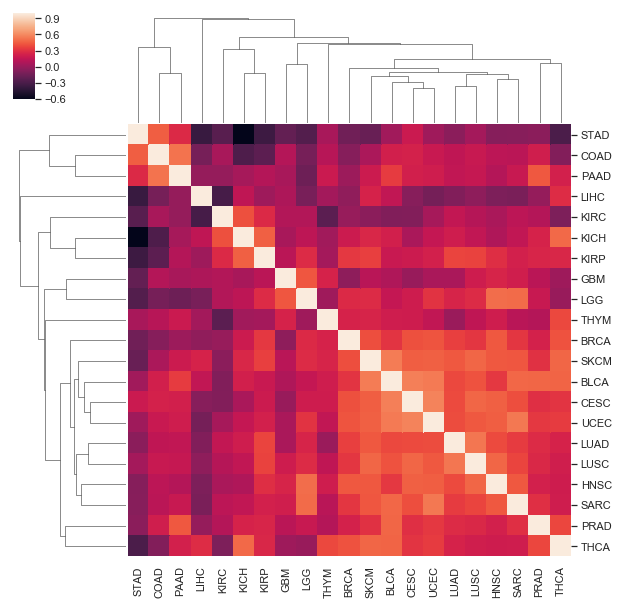

In [202]:
#clustering

import seaborn as sns; sns.set()
#c = corr
#c = c.pivot("month", "year", "passengers")
g = sns.clustermap(c)



In [197]:
predictions = p#pred_label[:,:num_class]
labels = l#pred_label[:,num_class] 


In [25]:
class_encoding = {'BLCA': 0, 'BRCA': 1, 'CESC': 2, 'COAD': 3, 'GBM': 4, 'HNSC': 5, 'KICH': 6, 'KIRC': 7, 'KIRP': 8, 'LGG': 9, 'LIHC': 10, 'LUAD': 11, 'LUSC': 12, 'PAAD': 13, 'PRAD': 14, 'SARC': 15, 'SKCM': 16, 'STAD': 17, 'THCA': 18, 'THYM': 19, 'UCEC': 20}


In [29]:
#class_encoding = class_encoding.strip('\n').strip('{').strip('}')
class_names = []
class_codes = []

for k,v in class_encoding.items():
    class_names.append(k)
    class_codes.append(v)
    
class_names = sorted(class_names)
class_codes = sorted(class_codes)


class_coding = {}
for i in range(len(class_names)):
    class_coding[class_codes[i]] = class_names[i]

print(class_coding)

{0: 'BLCA', 1: 'BRCA', 2: 'CESC', 3: 'COAD', 4: 'GBM', 5: 'HNSC', 6: 'KICH', 7: 'KIRC', 8: 'KIRP', 9: 'LGG', 10: 'LIHC', 11: 'LUAD', 12: 'LUSC', 13: 'PAAD', 14: 'PRAD', 15: 'SARC', 16: 'SKCM', 17: 'STAD', 18: 'THCA', 19: 'THYM', 20: 'UCEC'}


In [44]:
def get_tpf_fpr(predictions, labels, class_codes):
    """
    Given predictions and labels, return the AUCs for all classes
    and micro, macro AUCs. Also saves a plot of the ROC curve to the
    path.

    """

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    if len(classes) > 2:
        # Convert labels to one-hot-encoding
        labels = label_binarize(labels, classes = classes)

        ### Individual class AUC ###
        for i in classes:
            fpr[i], tpr[i], _ = roc_curve(labels[:, i], predictions[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        ### Micro AUC ###
        fpr["micro"], tpr["micro"], _ = roc_curve(labels.ravel(), predictions.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        ### Macro AUC ###
        all_fpr = np.unique(np.concatenate([fpr[i] for i in classes]))
        mean_tpr = np.zeros_like(all_fpr)
        for i in classes:
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        mean_tpr /= len(classes)

        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        ### Make plot ###      
    else:
        fpr, tpr, _ = roc_curve(labels, predictions[:,1])
        auc_result = auc(fpr, tpr)

        for i in list(classes) + ['macro', 'micro']:
            roc_auc[i] = auc_result 

    return fpr, tpr, roc_auc

In [95]:
#confidence interval

def get_error_all(pred, true, classes=[0, 1, 2]):
    num_class=len(classes)

    n_bootstraps = 1000
    rng_seed0 = 42  # control reproducibility
    rng_seed1 = 100 # control reproducibility
    rng_seed2 = 250  # control reproducibility
    rng_seed3 = 400  # control reproducibility
    rng_seed4 = 650  # control reproducibility
    rng_seed5 = 876  # control reproducibility
    rng_seed6 = 256  # control reproducibility
    rng_seed7 = 93  # control reproducibility
    rng_seed8 = 8736  # control reproducibility
    rng_seed9 = 42  # control reproducibility
    rng_seed10 = 101 # control reproducibility
    rng_seed11 = 251  # control reproducibility
    rng_seed12 = 401  # control reproducibility
    rng_seed13 = 651  # control reproducibility
    rng_seed14 = 871  # control reproducibility
    rng_seed15 = 251  # control reproducibility
    rng_seed16 = 91  # control reproducibility
    rng_seed17 = 8731  # control reproducibility
    rng_seed18 = 45  # control reproducibility
    rng_seed19 = 105 # control reproducibility
    rng_seed20 = 255  # control reproducibility
    rng_seed = 4537  # control reproducibility

    bootstrapped_scores0 = []
    bootstrapped_scores1 = []
    bootstrapped_scores2 = []
    bootstrapped_scores3 = []
    bootstrapped_scores4 = []
    bootstrapped_scores5 = []
    bootstrapped_scores6 = []
    bootstrapped_scores7 = []
    bootstrapped_scores8 = []
    bootstrapped_scores9 = []
    bootstrapped_scores10 = []
    bootstrapped_scores11 = []
    bootstrapped_scores12 = []
    bootstrapped_scores13 = []
    bootstrapped_scores14 = []
    bootstrapped_scores15 = []
    bootstrapped_scores16 = []
    bootstrapped_scores17 = []
    bootstrapped_scores18 = []
    bootstrapped_scores19 = []
    bootstrapped_scores20 = []
    bootstrapped_scores = []
    
    rng0 = np.random.RandomState(rng_seed0)
    rng1 = np.random.RandomState(rng_seed1)
    rng2 = np.random.RandomState(rng_seed2)
    rng3 = np.random.RandomState(rng_seed3)
    rng4 = np.random.RandomState(rng_seed4)
    rng5 = np.random.RandomState(rng_seed5)
    rng6 = np.random.RandomState(rng_seed6)
    rng7 = np.random.RandomState(rng_seed7)
    rng8 = np.random.RandomState(rng_seed8)
    rng9 = np.random.RandomState(rng_seed9)
    rng10 = np.random.RandomState(rng_seed10)
    rng11 = np.random.RandomState(rng_seed11)
    rng12 = np.random.RandomState(rng_seed12)
    rng13 = np.random.RandomState(rng_seed13)
    rng14 = np.random.RandomState(rng_seed14)
    rng15 = np.random.RandomState(rng_seed15)
    rng16= np.random.RandomState(rng_seed16)
    rng17 = np.random.RandomState(rng_seed17)
    rng18 = np.random.RandomState(rng_seed18)
    rng19= np.random.RandomState(rng_seed19)
    rng20 = np.random.RandomState(rng_seed20)
    rng = np.random.RandomState(rng_seed)
   
    true_all=true.ravel()
    pred_all=pred.ravel()
   

    for i in range(n_bootstraps):
        # bootstrap by sampling with replacement on the prediction indices
        indices0 = rng0.random_integers(0, len(pred[:,0]) - 1, len(pred[:,0]))
        if len(np.unique(true[indices0,0])) < 2:
            continue
        indices1 = rng1.random_integers(0, len(pred[:,1]) - 1, len(pred[:,1]))
        if len(np.unique(true[indices1,1])) < 2:
             continue
        if num_class>2:
            indices2 = rng2.random_integers(0, len(pred[:,2]) - 1, len(pred[:,2]))
            if len(np.unique(true[indices2,2])) < 2:
                continue
    
        if num_class>3:
            indices3 = rng3.random_integers(0, len(pred[:,3]) - 1, len(pred[:,3]))
            if len(np.unique(true[indices3,2])) < 2:
                continue
                
        if num_class>8:
            indices4 = rng4.random_integers(0, len(pred[:,4]) - 1, len(pred[:,4]))
            indices5 = rng5.random_integers(0, len(pred[:,5]) - 1, len(pred[:,5]))
            indices6 = rng6.random_integers(0, len(pred[:,6]) - 1, len(pred[:,6]))
            indices7 = rng7.random_integers(0, len(pred[:,7]) - 1, len(pred[:,7]))
            indices8 = rng8.random_integers(0, len(pred[:,8]) - 1, len(pred[:,8]))
            indices9 = rng9.random_integers(0, len(pred[:,9]) - 1, len(pred[:,9]))
            indices10 = rng10.random_integers(0, len(pred[:,10]) - 1, len(pred[:,10]))
            indices11 = rng11.random_integers(0, len(pred[:,11]) - 1, len(pred[:,11]))
            indices12 = rng12.random_integers(0, len(pred[:,12]) - 1, len(pred[:,12]))
            indices13 = rng13.random_integers(0, len(pred[:,13]) - 1, len(pred[:,13]))
            indices14 = rng14.random_integers(0, len(pred[:,14]) - 1, len(pred[:,14]))
            indices15 = rng15.random_integers(0, len(pred[:,15]) - 1, len(pred[:,15]))
            indices16 = rng16.random_integers(0, len(pred[:,16]) - 1, len(pred[:,16]))
            indices17 = rng17.random_integers(0, len(pred[:,17]) - 1, len(pred[:,17]))
            indices18 = rng18.random_integers(0, len(pred[:,18]) - 1, len(pred[:,18]))
            indices19 = rng19.random_integers(0, len(pred[:,19]) - 1, len(pred[:,19]))
            indices20 = rng20.random_integers(0, len(pred[:,20]) - 1, len(pred[:,20]))
            if len(np.unique(true[indices4,2])) < 2:
                continue
            if len(np.unique(true[indices5,2])) < 2:
                continue
            if len(np.unique(true[indices6,2])) < 2:
                continue
            if len(np.unique(true[indices7,2])) < 2:
                continue
            if len(np.unique(true[indices8,2])) < 2:
                continue
            if len(np.unique(true[indices9,2])) < 2:
                continue
            if len(np.unique(true[indices10,2])) < 2:
                continue
            if len(np.unique(true[indices11,2])) < 2:
                continue
            if len(np.unique(true[indices12,2])) < 2:
                continue
            if len(np.unique(true[indices13,2])) < 2:
                continue
            if len(np.unique(true[indices14,2])) < 2:
                continue
            if len(np.unique(true[indices15,2])) < 2:
                continue
            if len(np.unique(true[indices16,2])) < 2:
                continue
            if len(np.unique(true[indices17,2])) < 2:
                continue
            if len(np.unique(true[indices18,2])) < 2:
                continue
            if len(np.unique(true[indices19,2])) < 2:
                continue
            if len(np.unique(true[indices20,2])) < 2:
                continue
                
          
        #for all classes 
        indices = rng.random_integers(0, len(pred_all) - 1, len(pred_all))
        if len(np.unique(true_all[indices])) < 2:
            continue
       

        score0 = roc_auc_score(true[indices0,0], pred[indices0,0])
        score1 = roc_auc_score(true[indices1,1], pred[indices1,1])
        if num_class>2:
            score2 = roc_auc_score(true[indices2,2], pred[indices2,2])
        if num_class>3:
            score3 = roc_auc_score(true[indices3,3], pred[indices3,3])
        if num_class>8:
            score4 = roc_auc_score(true[indices4,4], pred[indices4,4])  
            score5 = roc_auc_score(true[indices5,5], pred[indices5,5])
            score6 = roc_auc_score(true[indices6,6], pred[indices6,6])
            score7 = roc_auc_score(true[indices7,7], pred[indices7,7])
            score8 = roc_auc_score(true[indices8,8], pred[indices8,8])
            score9 = roc_auc_score(true[indices9,9], pred[indices9,9])
            score10 = roc_auc_score(true[indices10,10], pred[indices10,10])
            score11 = roc_auc_score(true[indices11,11], pred[indices11,11])
            score12 = roc_auc_score(true[indices12,12], pred[indices12,12])
            score13 = roc_auc_score(true[indices13,13], pred[indices13,13])
            score14 = roc_auc_score(true[indices14,14], pred[indices14,14])
            score15 = roc_auc_score(true[indices15,15], pred[indices15,15])
            score16 = roc_auc_score(true[indices16,16], pred[indices16,16])
            score17 = roc_auc_score(true[indices17,17], pred[indices17,17])
            score18 = roc_auc_score(true[indices18,18], pred[indices18,18])
            score19 = roc_auc_score(true[indices19,19], pred[indices19,19])
            score20 = roc_auc_score(true[indices20,20], pred[indices20,20])
        score = roc_auc_score(true_all[indices], pred_all[indices])
 


        bootstrapped_scores0.append(score0)
        bootstrapped_scores1.append(score1)
        if num_class>2:
            bootstrapped_scores2.append(score2)
        if num_class>3:
            bootstrapped_scores3.append(score3)
        if num_class>8:
            bootstrapped_scores4.append(score4)
            bootstrapped_scores5.append(score5)
            bootstrapped_scores6.append(score6)
            bootstrapped_scores7.append(score7)
            bootstrapped_scores8.append(score8)
            bootstrapped_scores9.append(score9)
            bootstrapped_scores10.append(score10)
            bootstrapped_scores11.append(score11)
            bootstrapped_scores12.append(score12)
            bootstrapped_scores13.append(score13)
            bootstrapped_scores14.append(score14)
            bootstrapped_scores15.append(score15)
            bootstrapped_scores16.append(score16)
            bootstrapped_scores17.append(score17)
            bootstrapped_scores18.append(score18)
            bootstrapped_scores19.append(score19)
            bootstrapped_scores20.append(score20)
        bootstrapped_scores.append(score)

    sorted_scores0 = np.array(bootstrapped_scores0)
    sorted_scores0.sort()
    confidence_lower0 = sorted_scores0[int(0.05 * len(sorted_scores0))]
    confidence_upper0 = sorted_scores0[int(0.95 * len(sorted_scores0))]

    sorted_scores1 = np.array(bootstrapped_scores1)
    sorted_scores1.sort()
    confidence_lower1 = sorted_scores1[int(0.05 * len(sorted_scores1))]
    confidence_upper1 = sorted_scores1[int(0.95 * len(sorted_scores1))]

    if num_class>2:
        sorted_scores2 = np.array(bootstrapped_scores2)
        sorted_scores2.sort()
        confidence_lower2 = sorted_scores2[int(0.05 * len(sorted_scores2))]
        confidence_upper2 = sorted_scores2[int(0.95 * len(sorted_scores2))]
        sorted_scores3 = np.array(bootstrapped_scores3)
        sorted_scores3.sort()
        confidence_lower3 = sorted_scores3[int(0.05 * len(sorted_scores3))]
        confidence_upper3 = sorted_scores3[int(0.95 * len(sorted_scores3))]
        sorted_scores4 = np.array(bootstrapped_scores4)
        sorted_scores4.sort()
        confidence_lower4 = sorted_scores4[int(0.05 * len(sorted_scores4))]
        confidence_upper4 = sorted_scores4[int(0.95 * len(sorted_scores4))]
        sorted_scores5 = np.array(bootstrapped_scores5)
        sorted_scores5.sort()
        confidence_lower5 = sorted_scores5[int(0.05 * len(sorted_scores5))]
        confidence_upper5 = sorted_scores5[int(0.95 * len(sorted_scores5))]
        sorted_scores6 = np.array(bootstrapped_scores6)
        sorted_scores6.sort()
        confidence_lower6 = sorted_scores6[int(0.05 * len(sorted_scores6))]
        confidence_upper6 = sorted_scores6[int(0.95 * len(sorted_scores6))]
        sorted_scores7 = np.array(bootstrapped_scores7)
        sorted_scores7.sort()
        confidence_lower7 = sorted_scores7[int(0.05 * len(sorted_scores7))]
        confidence_upper7 = sorted_scores7[int(0.95 * len(sorted_scores7))]
        sorted_scores8 = np.array(bootstrapped_scores8)
        sorted_scores8.sort()
        confidence_lower8 = sorted_scores8[int(0.05 * len(sorted_scores8))]
        confidence_upper8 = sorted_scores8[int(0.95 * len(sorted_scores8))]
        sorted_scores9 = np.array(bootstrapped_scores9)
        sorted_scores9.sort()
        confidence_lower9 = sorted_scores9[int(0.05 * len(sorted_scores9))]
        confidence_upper9 = sorted_scores9[int(0.95 * len(sorted_scores9))]
        sorted_scores10 = np.array(bootstrapped_scores10)
        sorted_scores10.sort()
        confidence_lower10 = sorted_scores10[int(0.05 * len(sorted_scores10))]
        confidence_upper10 = sorted_scores10[int(0.95 * len(sorted_scores10))]
        sorted_scores11 = np.array(bootstrapped_scores11)
        sorted_scores11.sort()
        confidence_lower11 = sorted_scores11[int(0.05 * len(sorted_scores11))]
        confidence_upper11 = sorted_scores11[int(0.95 * len(sorted_scores11))]
        sorted_scores12 = np.array(bootstrapped_scores12)
        sorted_scores12.sort()
        confidence_lower12 = sorted_scores12[int(0.05 * len(sorted_scores12))]
        confidence_upper12 = sorted_scores12[int(0.95 * len(sorted_scores12))]
        sorted_scores13 = np.array(bootstrapped_scores13)
        sorted_scores13.sort()
        confidence_lower13 = sorted_scores13[int(0.05 * len(sorted_scores13))]
        confidence_upper13 = sorted_scores13[int(0.95 * len(sorted_scores13))]
        sorted_scores14 = np.array(bootstrapped_scores14)
        sorted_scores14.sort()
        confidence_lower14 = sorted_scores14[int(0.05 * len(sorted_scores14))]
        confidence_upper14 = sorted_scores14[int(0.95 * len(sorted_scores14))]
        sorted_scores15 = np.array(bootstrapped_scores15)
        sorted_scores15.sort()
        confidence_lower15 = sorted_scores15[int(0.05 * len(sorted_scores15))]
        confidence_upper15 = sorted_scores15[int(0.95 * len(sorted_scores15))]
        sorted_scores16 = np.array(bootstrapped_scores16)
        sorted_scores16.sort()
        confidence_lower16 = sorted_scores16[int(0.05 * len(sorted_scores16))]
        confidence_upper16 = sorted_scores16[int(0.95 * len(sorted_scores16))]
        sorted_scores17 = np.array(bootstrapped_scores17)
        sorted_scores17.sort()
        confidence_lower17 = sorted_scores17[int(0.05 * len(sorted_scores17))]
        confidence_upper17 = sorted_scores17[int(0.95 * len(sorted_scores17))]
        sorted_scores18 = np.array(bootstrapped_scores18)
        sorted_scores18.sort()
        confidence_lower18 = sorted_scores18[int(0.05 * len(sorted_scores18))]
        confidence_upper18 = sorted_scores18[int(0.95 * len(sorted_scores18))]
        sorted_scores19 = np.array(bootstrapped_scores19)
        sorted_scores19.sort()
        confidence_lower19 = sorted_scores19[int(0.05 * len(sorted_scores19))]
        confidence_upper19 = sorted_scores19[int(0.95 * len(sorted_scores19))]
        sorted_scores20 = np.array(bootstrapped_scores20)
        sorted_scores20.sort()
        confidence_lower20 = sorted_scores20[int(0.05 * len(sorted_scores20))]
        confidence_upper20 = sorted_scores20[int(0.95 * len(sorted_scores20))]
        
    #micro
    sorted_scores_micro=np.array(bootstrapped_scores)                                      
    sorted_scores_micro.sort()
                                      
    confidence_lower_micro = sorted_scores_micro[int(0.05 * len(sorted_scores_micro))]
    confidence_upper_micro = sorted_scores_micro[int(0.95 * len(sorted_scores_micro))]                                    


    #macro
    if num_class==21:
        sorted_scores_macro=np.array(np.concatenate((bootstrapped_scores0,bootstrapped_scores1,bootstrapped_scores2,bootstrapped_scores3,bootstrapped_scores4,bootstrapped_scores5,bootstrapped_scores6,bootstrapped_scores7,bootstrapped_scores8,bootstrapped_scores9,bootstrapped_scores10,bootstrapped_scores11,bootstrapped_scores12,bootstrapped_scores13,bootstrapped_scores14,bootstrapped_scores15,bootstrapped_scores16,bootstrapped_scores17,bootstrapped_scores18,bootstrapped_scores19,bootstrapped_scores20), axis=0))
    
    
    sorted_scores_macro.sort()
                                      
    confidence_lower_macro = sorted_scores_macro[int(0.05 * len(sorted_scores_macro))]
    confidence_upper_macro = sorted_scores_macro[int(0.95 * len(sorted_scores_macro))]                                    
    
    if num_class==21:
        all= [confidence_lower_macro, confidence_upper_macro,confidence_lower_micro, confidence_upper_micro, confidence_lower0,  confidence_upper0,confidence_lower1, confidence_upper1,confidence_lower2, confidence_upper2,confidence_lower3, confidence_upper3,confidence_lower4, confidence_upper4,confidence_lower5, confidence_upper5,confidence_lower6, confidence_upper6,confidence_lower7, confidence_upper7,confidence_lower8, confidence_upper8,confidence_lower9,  confidence_upper9,confidence_lower10, confidence_upper10,confidence_lower11, confidence_upper11,confidence_lower12, confidence_upper12,confidence_lower13, confidence_upper13,confidence_lower14, confidence_upper14,confidence_lower15, confidence_upper15,confidence_lower16, confidence_upper16,confidence_lower17, confidence_upper17,confidence_lower18, confidence_upper18,confidence_lower19, confidence_upper19,confidence_lower20, confidence_upper20]

    return all


In [120]:
def get_auc(predictions, labels, class_names, classes=[0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]):

    """
    Given predictions and labels, return the AUCs for all classes
    and micro, macro AUCs. Also saves a plot of the ROC curve to the
    path.
    """

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    label=labels 

    if len(classes) > 2:
        # Convert labels to one-hot-encoding
        labels = label_binarize(labels, classes = classes)

        ### Individual class AUC ###
        for i in classes:
            fpr[i], tpr[i], _ = roc_curve(labels[:, i], predictions[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        errors=get_error_all(predictions,labels,classes)

        ### Micro AUC ###
        fpr["micro"], tpr["micro"], _ = roc_curve(labels.ravel(), predictions.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
        roc_auc["micro_cl"]=errors[2]
        roc_auc["micro_cu"]=errors[3]


        ### Macro AUC ###
        all_fpr = np.unique(np.concatenate([fpr[i] for i in classes]))
        mean_tpr = np.zeros_like(all_fpr)
        for i in classes:
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        mean_tpr /= len(classes)

        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"]) 
        roc_auc["macro_cl"]=errors[0]      
        roc_auc["macro_cu"]=errors[1]
 


        roc_auc["cu0"]=errors[5]
        roc_auc["cu1"]=errors[7]
        roc_auc["cu2"]=errors[9]
        roc_auc["cu3"]=errors[11]
        roc_auc["cu4"]=errors[13]
        roc_auc["cu5"]=errors[15]
        roc_auc["cu6"]=errors[17]
        roc_auc["cu7"]=errors[19]
        roc_auc["cu8"]=errors[21]
        roc_auc["cu9"]=errors[23]
        roc_auc["cu10"]=errors[25]
        roc_auc["cu11"]=errors[27]
        roc_auc["cu12"]=errors[29]
        roc_auc["cu13"]=errors[31]
        roc_auc["cu14"]=errors[33]
        roc_auc["cu15"]=errors[35]
        roc_auc["cu16"]=errors[37]
        roc_auc["cu17"]=errors[39]
        roc_auc["cu18"]=errors[41]
        roc_auc["cu19"]=errors[43]
        roc_auc["cu20"]=errors[45]
 
        roc_auc["cl0"]=errors[4]
        roc_auc["cl1"]=errors[6]
        roc_auc["cl2"]=errors[8]
        roc_auc["cl3"]=errors[10]
        roc_auc["cl4"]=errors[12]
        roc_auc["cl5"]=errors[14]
        roc_auc["cl6"]=errors[16]
        roc_auc["cl7"]=errors[18]
        roc_auc["cl8"]=errors[20]
        roc_auc["cl9"]=errors[22]
        roc_auc["cl10"]=errors[24]
        roc_auc["cl11"]=errors[26]
        roc_auc["cl12"]=errors[28]
        roc_auc["cl13"]=errors[30]
        roc_auc["cl14"]=errors[32]
        roc_auc["cl15"]=errors[34]
        roc_auc["cl16"]=errors[36]
        roc_auc["cl17"]=errors[38]
        roc_auc["cl18"]=errors[40]
        roc_auc["cl19"]=errors[42]
        roc_auc["cl20"]=errors[44]

        #new metrics
        #precision = precision_score(label, np.argmax(predictions,axis=1),average='macro')
        #recall = recall_score(label, np.argmax(predictions,axis=1), average='macro')
        #cohenskappa = cohen_kappa_score(label, np.argmax(predictions,axis=1))
        #jaccard = jaccard_similarity_score(label, np.argmax(predictions,axis=1))
        #logloss = log_loss(label, predictions, labels=classes)
         
        #roc_auc['precision']=precision
        #roc_auc['recall']=recall
        #roc_auc['cohenskappa']=cohenskappa
        #roc_auc['jaccard']=jaccard
        #roc_auc['logloss']=logloss

        ### Make plot ###
        plt.figure(figsize=(12, 12))
        plt.plot(fpr["micro"], tpr["micro"],
                 label='micro-average: AUC = {0:0.3f}'
                       ''.format(roc_auc["micro"]),
                 color='deeppink', linestyle=':', linewidth=4)

        plt.plot(fpr["macro"], tpr["macro"],
                 label='macro-average: AUC = {0:0.3f}'
                       ''.format(roc_auc["macro"]),
                 color='navy', linestyle=':', linewidth=4)

        colors = cycle(['aqua', 'darkorange', 'cornflowerblue','forestgreen','sienna','darkslateblue','limegreen','cadetblue','firebrick'])
        for i, color in zip(classes, colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=2,
                     label='{0}: AUC = {1:0.3f}'
                     ''.format(class_names[i], roc_auc[i]))


    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=34)
    plt.ylabel('True Positive Rate', fontsize=34)
    plt.title('ROC Curve', fontsize=32)
    plt.legend(loc="lower right", fontsize=24)
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)

    print(class_encoding)
    print(roc_auc)
    return roc_auc

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:101: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:101: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:101: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:101: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:101: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:103: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:104: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:105: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:106: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:101: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:104: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:105: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:106: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:109: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:101: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:104: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:105: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:106: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:109: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:101: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:103: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:101: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:101: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:105: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:106: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:109: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:110: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:106: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:109: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:110: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:111: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:101: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:103: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:104: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:105: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:101: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning:

This function is deprecated. Please call randint(0, 566 + 1) instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10

{'BLCA': 0, 'BRCA': 1, 'CESC': 2, 'COAD': 3, 'GBM': 4, 'HNSC': 5, 'KICH': 6, 'KIRC': 7, 'KIRP': 8, 'LGG': 9, 'LIHC': 10, 'LUAD': 11, 'LUSC': 12, 'PAAD': 13, 'PRAD': 14, 'SARC': 15, 'SKCM': 16, 'STAD': 17, 'THCA': 18, 'THYM': 19, 'UCEC': 20}
{0: 0.8682805710738671, 1: 0.8078189300411521, 2: 0.7015498364851415, 3: 0.9152949245541837, 4: 0.9778028094354625, 5: 0.8768884177047442, 6: 0.9721716251770895, 7: 0.9703243173952059, 8: 0.8643537608417459, 9: 0.909424650938854, 10: 0.9751707014276847, 11: 0.8624663849404534, 12: 0.8552767527675277, 13: 0.888924496859377, 14: 0.9622770919067214, 15: 0.8473363371322555, 16: 0.8793738489871087, 17: 0.92968850147417, 18: 0.9924270639354438, 19: 0.9716406042936655, 20: 0.9145242512589451, 'micro': 0.6724699756445788, 'micro_cl': 0.6517666889999654, 'micro_cu': 0.6937267251091855, 'macro': 0.9029825887040925, 'macro_cl': 0.7609813084112149, 'macro_cu': 0.9932595089070775, 'cu0': 0.9205692803437164, 'cu1': 0.8908951210142143, 'cu2': 0.8087050278061514, '

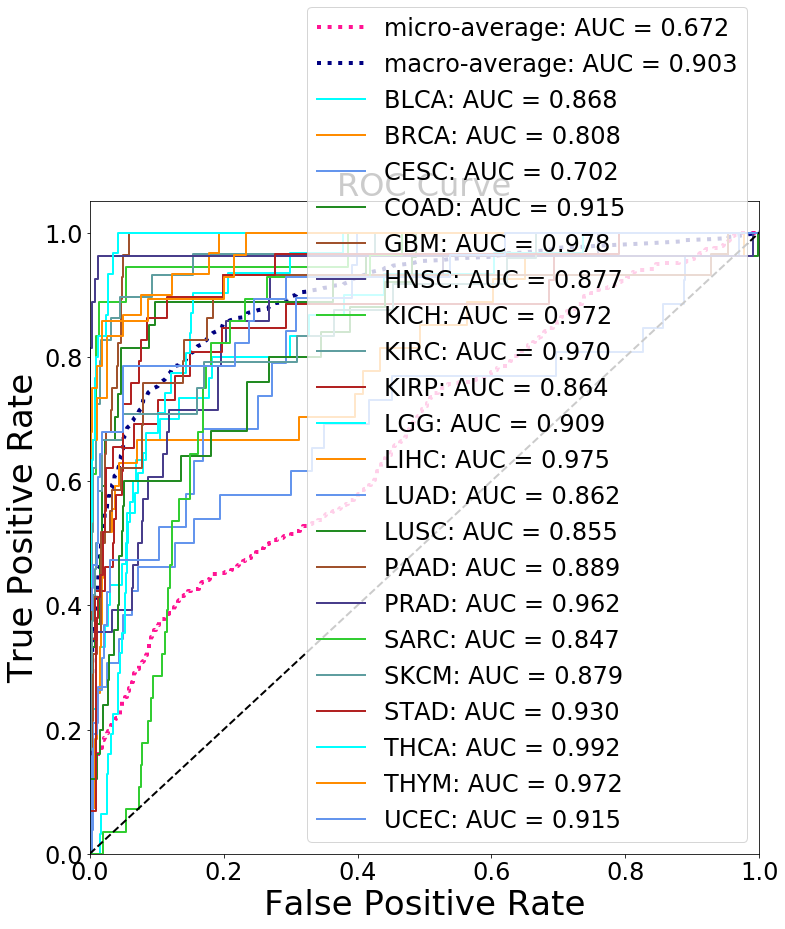

In [121]:
roc = get_auc(predictions, labels, class_names, class_codes)

In [190]:
### roc = pd.DataFrame(roc)
mean_auc = [roc[0],roc[1],roc[2],roc[3],roc[4],roc[5],roc[6],roc[7],roc[8],roc[9],roc[10],roc[11],roc[12],roc[13],roc[14],roc[15],roc[16],roc[17],roc[18],roc[19],roc[20]]
cu_auc = [roc["cu0"],roc["cu1"],roc["cu2"],roc["cu3"],roc["cu4"],roc["cu5"],roc["cu6"],roc["cu7"],roc["cu8"],roc["cu9"],roc["cu10"],roc["cu11"],roc["cu12"],roc["cu13"],roc["cu14"],roc["cu15"],roc["cu16"],roc["cu17"],roc["cu18"],roc["cu19"],roc["cu20"]]
cl_auc = [roc["cl0"],roc["cl1"],roc["cl2"],roc["cl3"],roc["cl4"],roc["cl5"],roc["cl6"],roc["cl7"],roc["cl8"],roc["cl9"],roc["cl10"],roc["cl11"],roc["cl12"],roc["cl13"],roc["cl14"],roc["cl15"],roc["cl16"],roc["cl17"],roc["cl18"],roc["cl19"],roc["cl20"]]
class_encoding = {'BLCA': 0, 'BRCA': 1, 'CESC': 2, 'COAD': 3, 'GBM': 4, 'HNSC': 5, 'KICH': 6, 'KIRC': 7, 'KIRP': 8, 'LGG': 9, 'LIHC': 10, 'LUAD': 11, 'LUSC': 12, 'PAAD': 13, 'PRAD': 14, 'SARC': 15, 'SKCM': 16, 'STAD': 17, 'THCA': 18, 'THYM': 19, 'UCEC': 20}

class_encoding.keys()

d = {'mean': mean_auc, 'cl': cl_auc, 'cu':cu_auc}
aucs = pd.DataFrame(data=d, index = class_encoding.keys())
aucs

aucs['error_pos']=aucs['mean']-aucs['cl']
aucs['error_neg']=aucs['cu']-aucs['mean']


In [191]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)


In [192]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = {"x": list(aucs['mean']), 
          "y": list(class_encoding.keys()), 
          "marker": {"color": "blue", "size": 12}, 
          "mode": "markers", 
          "name": "Women", 
          "type": "scatter" ,  
          "error_x": dict(
            type='data',
            symmetric=False,
            array=list(aucs['error_pos']),
            arrayminus=list(aucs['error_neg']))
}

data = [trace1]
layout = {"title": "pan-cancer class AUCs", 
          "xaxis": {"title": "AUC", }}#, 
          #"yaxis": {"title": "School"}}

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filenmae='basic_dot-plot')

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

